In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import numpy as np
import random

from scipy.stats import norm
from ipywidgets import *

In [27]:
### Set reproducibility
np.random.seed(42)
random.seed(42)
qs=norm(0, 1).rvs((3,))

In [21]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [24]:
### Create a colouring from cool to warm
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])
cnorm = mcol.Normalize(vmin=0,vmax=100)
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])

<IPython.core.display.Javascript object>


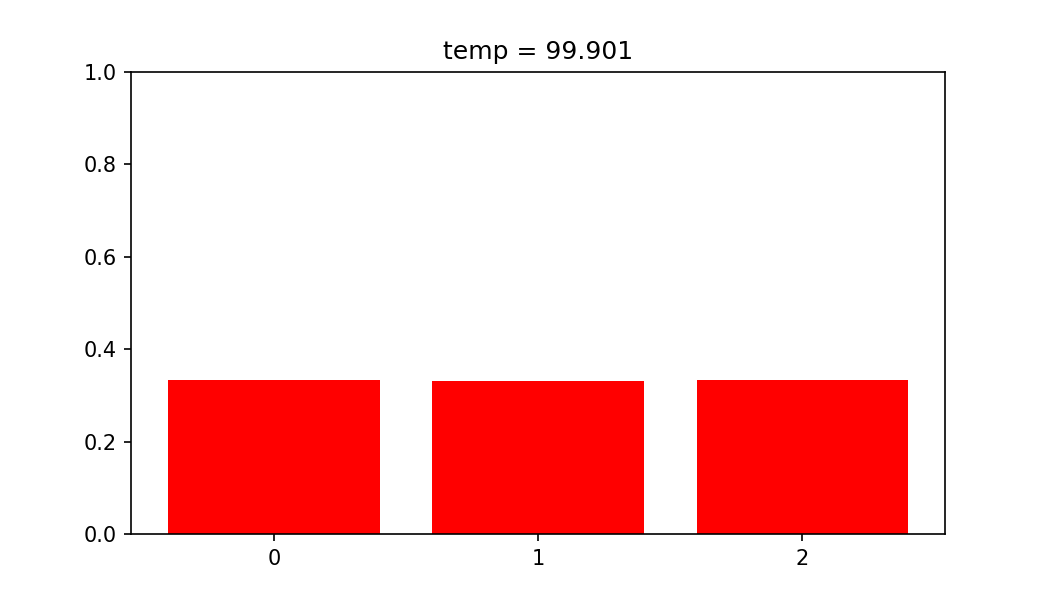

interactive(children=(FloatSlider(value=0.01, description='t', min=0.001), Output()), _dom_classes=('widget-in…

<function __main__.update(t=1.0)>

In [32]:
%matplotlib notebook

qs_prob= softmax(qs)
fig_t = plt.figure(figsize=(7,4))
ax_t = fig_t.add_subplot(1, 1, 1)
ax_t.set_ylim(0.0, 1.0)
line_t = ax_t.bar(range(qs_prob.shape[0]), qs_prob, color=cpick.to_rgba(1.0))
ax_t.set_title('temp = {}'.format(1.0))

def update(t = 1.0):
    ax_t.clear()
    qs_prob = softmax(qs / t)
    ax_t.set_ylim(0.0, 1.0)
    plt.xticks(range(3))
    ax_t.bar(range(qs_prob.shape[0]), qs_prob, color=cpick.to_rgba(t))
    ax_t.set_title('temp = {}'.format(t))
    
interact(update, t=widgets.FloatSlider(min=0.001, max=100.0, step=0.1, value=0.01))